In [888]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [889]:
death_data = pd.read_csv('deaths.csv')
confirmed_data = pd.read_csv('confirmed.csv')
death_data = death_data.drop('Province/State', axis = 1)
confirmed_data = confirmed_data.drop('Province/State', axis = 1)
location_data = pd.DataFrame({'Country': confirmed_data['Country/Region'], 'Lat': confirmed_data['Lat'], 'Long' : confirmed_data['Long']}, columns=['Country', 'Lat', 'Long'])
location_data = location_data.groupby('Country').agg('mean')

In [890]:
death_data = death_data.drop('Lat', axis = 1)
death_data = death_data.drop('Long', axis = 1)
confirmed_data = confirmed_data.drop('Lat', axis = 1)
confirmed_data = confirmed_data.drop('Long', axis = 1)

In [892]:
confirmed_data = confirmed_data.groupby('Country/Region').agg('sum')
#confirmed_data = confirmed_data.join(location_data)
death_data = death_data.groupby('Country/Region').agg('sum')
#death_data = death_data.join(location_data)

In [894]:
countryfilter = confirmed_data.index.isin(["South Korea", "Italy", "China", "US", "Japan", "United Kingdom", "France", "Korea South"])
confirmed_data = confirmed_data[countryfilter]
death_data = death_data[countryfilter]

In [895]:
China = confirmed_data.iloc[0].divide(14377.22468)
France = confirmed_data.iloc[1].divide(652.73511)[2:]
Italy = confirmed_data.iloc[2].divide(604.87167)[9:]
Japan = confirmed_data.iloc[3].divide(1265.87521)
USA = confirmed_data.iloc[4].divide(3304.41184)
Korea = confirmed_data.iloc[5].divide(512.56069)

In [896]:
confirmed_data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033
France,0,0,2,3,3,3,4,5,5,5,...,957,1134,1217,1792,2289,2289,3672,4480,4513,6650
Italy,0,0,0,0,0,0,0,0,0,2,...,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980
Japan,2,1,2,2,4,4,7,7,11,15,...,461,502,511,581,639,639,701,773,839,825
US,1,1,2,2,5,5,5,5,5,7,...,402,518,583,959,1281,1663,2179,2727,3499,4632


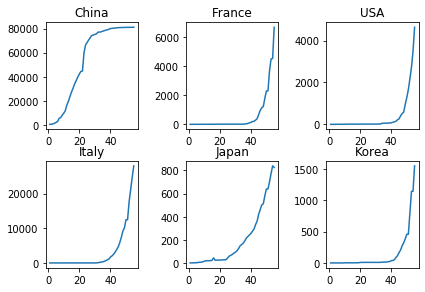

In [898]:
fig,a =  plt.subplots(2,3)
x = np.arange(1,5)
fig.tight_layout()
a[0][0].plot(range(1,56), confirmed_data.iloc[0])
a[0][0].set_title('China')
a[0][1].plot(range(1,56), confirmed_data.iloc[1])
a[0][1].set_title('France')
a[1][0].plot(range(1,56), confirmed_data.iloc[2])
a[1][0].set_title('Italy')
a[1][1].plot(range(1,56), confirmed_data.iloc[3])
a[1][1].set_title('Japan')
a[0][2].plot(range(1,56), confirmed_data.iloc[4])
a[0][2].set_title('USA')
a[1][2].plot(range(1,56), confirmed_data.iloc[5])
a[1][2].set_title('Korea')
plt.show()


In [930]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    ema = timeseries.ewm(7).mean()
    rolmean = timeseries.rolling(7).mean()
    stat = rolmean-ema
    rolstd = timeseries.rolling(7).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    #plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(stat, color= 'green', label = 'Smoothed')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    #print (dfoutput)
    

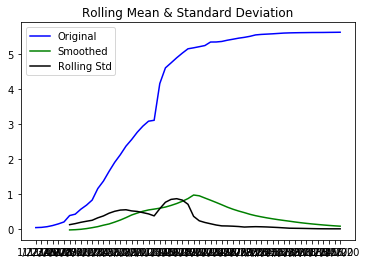

Results of Dickey-Fuller Test:


In [931]:
test_stationarity(China)